# Network features Histograms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json  # for json files
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np


In [4]:
# read data
data = pd.read_csv("data_sample.csv")

# extract hostnames (just for future work)
hostnames = data["host"].unique()            # get unique names
hostnames = list(map(as_json, hostnames))  # get json files
hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])

# get id of interest
id_float = data.system.map(lambda x: isinstance(x, float)) # same as is nan
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()

# get all network data
id_network = data.loc[id_string]["event"].map(lambda x: "network" in x)
# get network values that are not NaN (otherwise, "as_json" does not work)
network_values = data.loc[id_string][id_network]["system"].map(lambda x: as_json(x))
# extract indices of interest
out_bytes = network_values.map(lambda x: x["network"]["out"]["bytes"])
in_bytes  = network_values.map(lambda x: x["network"]["in"]["bytes"])

# normalize data in (0,1) interval
# out_bytes.min() should be zero, but just in case 
out_bytes_norm = out_bytes/(out_bytes.max() - out_bytes.min())
in_bytes_norm = in_bytes/(in_bytes.max() - in_bytes.min())

## Plots

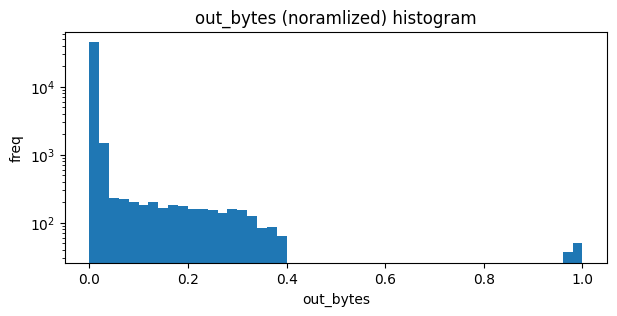

In [9]:
fig, ax = plt.subplots(figsize=(7,3))
plt.title("out_bytes (noramlized) histogram")
ax.hist(x=out_bytes_norm, bins=50)
ax.set_yscale("log")
ax.set_xlabel("out_bytes")
ax.set_ylabel("freq")
plt.show()

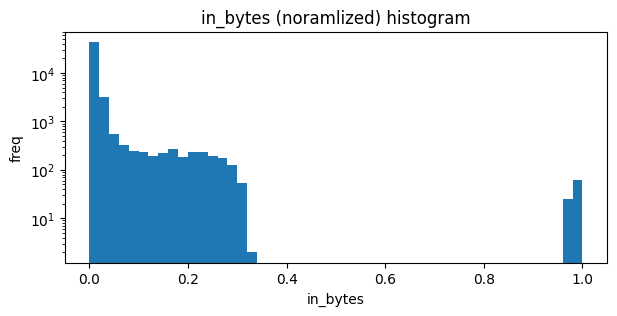

In [11]:
fig, ax = plt.subplots(figsize=(7,3))
plt.title("in_bytes (noramlized) histogram")
ax.hist(x=in_bytes_norm, bins=50)
ax.set_yscale("log")
ax.set_xlabel("in_bytes")
ax.set_ylabel("freq")
plt.show()
